Accuracies are calculated in performance_mercer and performance_taggart

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspesct < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=-.1-xlim,
                        right=.1+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)

def plt_aspect(aspect):
    fig = plt.figure()
    adjustFigAspect(fig,aspect=aspect)
    return fig.add_subplot(111)

from scipy.stats import fisher_exact

def performance(lstm_h, bptr_h, find_h, totals, labels, title):
    step = .05
    sig_x, sig_y = [], []
    idx = np.linspace(0, step * len(labels), len(labels))
    for i, label in enumerate(labels):
        odds, pvalue =  fisher_exact([[lstm_h[i]*totals[i],
                                       totals[i]-lstm_h[i]*totals[i]],
                                      [bptr_h[i]*totals[i],
                                       totals[i]-bptr_h[i]*totals[i]]],
                                     'greater')
        print pvalue
        if pvalue < .05:
            sig_x += [idx[i]]
            sig_y += [.02+max(lstm_h[i], bptr_h[i])]
            
    plt_aspect(1.5)
            
    
    plt.scatter(sig_x, sig_y, marker = '*')
    plt.bar(idx-step/4,
            lstm_h, step/4.0, align = 'center', alpha = 0.5,  color = 'green', label = 'LaBranchoR')
    plt.bar(idx,
            bptr_h, step/4.0, align = 'center', alpha = 0.5, label = 'Branchpointer')
    plt.bar(idx+step/4,
            find_h, step/4.0, align = 'center', alpha = 0.5, color = 'orange', label = 'SVM-BPFinder')
    plt.xlim(0-step/1.5, step * len(labels) + step/1.5)
    plt.ylim(0, 1)
    plt.xticks(idx, labels)
    plt.yticks([0], [''])#np.linspace(.5, .95, 10))
    #plt.ylabel("Fraction matching experimental branchpoint")
    plt.yticks(np.linspace(0, 1, 11), np.linspace(0, 1, 11))
    plt.title(title)
    plt.legend(loc = 4)
    plt.show()

6.72065050129e-11
9.75618252033e-13
1.12593435299e-07
5.45340983617e-09
4.63985519933e-13
6.59647716344e-15


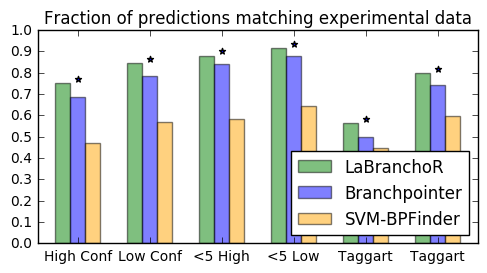

In [23]:
tag_lstm = [0.5623979818964238, 0.7996735420685561]
tag_bptr = [0.5008161448286096, 0.7438789137854281]
tag_find = [0.44775687409551373, 0.597973950795948]
tag_totals = [6739] * 2
tag_labels = ['Taggart', 'Taggart']

mer_lstm = [0.7514891589230402, 0.8465570645699309, 0.8803907553014058, 0.9170836311651179]
mer_bptr = [0.688348820586133, 0.7869907076483202, 0.8410769597331427, 0.8791994281629736]
mer_find = [0.47120297259637717, 0.5694379934974454, 0.5847654435671157, 0.6437529029261495]
mer_totals = [4197] * 4
mer_labels = ['High Conf','Low Conf','<5 High','<s5 Low']

performance(mer_lstm+tag_lstm, mer_bptr+tag_bptr, mer_find+tag_find,
            mer_totals+tag_totals, mer_labels+tag_labels,
            'Fraction of predictions matching experimental data')

1.33680282874e-16
1.18170158125e-20
3.99823611668e-15
3.32033988034e-18
2.07549852593e-18
2.99402906144e-25


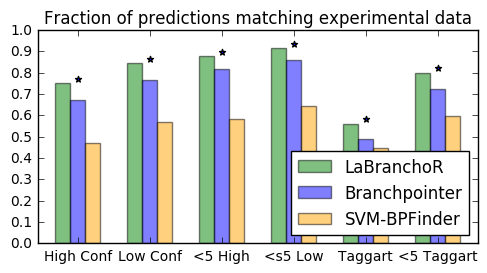

In [25]:
tag = [[0.5622286541244573, 0.8001447178002894],
       [0.48842257597684513, 0.7254703328509406],
       [0.44746743849493487, 0.5969609261939218]]     
tag_totals = [6910] * 2
tag_labels = ['Taggart', '<5 Taggart']

mer = [[0.7510450534138412, 0.8457965629354389, 0.8797027403622851, 0.9163957268927079],
       [0.6709242916860195, 0.7670692057594055, 0.8197863446353925, 0.8576405016256387],
       [0.47120297259637717, 0.5699024616813748, 0.5833720390153274, 0.6446818392940084]]
mer_totals = [4306] * 4
mer_labels = ['High Conf','Low Conf','<5 High','<s5 Low']

performance(mer[0]+tag[0], mer[1]+tag[1], mer[2]+tag[2],
            mer_totals+tag_totals, mer_labels+tag_labels,
            'Fraction of predictions matching experimental data')

6.41196511073e-13
7.24784082248e-16
2.89451672509e-11
4.46729283853e-13
4.62601204968e-13
9.5780724965e-19


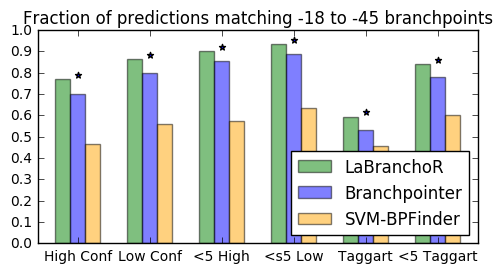

In [29]:
tag = [[0.594581823909277, 0.8401323042998897],
       [0.5315797763427311, 0.7790203181603402],
       [0.45818239092770513, 0.6022995747361789]]  
tag_totals = [6349] * 2
tag_labels = ['Taggart', '<5 Taggart']

mer = [[0.7717549829849295, 0.8648517258142927, 0.9015556635877492, 0.9331550802139037],
       [0.702722411278561, 0.7989790957705396, 0.8541565386485173, 0.8881866796305299],
       [0.4657267865824016, 0.5590666018473505, 0.5753524550315994, 0.6361205639280506]]
mer_totals = [4114] * 4
mer_labels = ['High Conf','Low Conf','<5 High','<s5 Low']

performance(mer[0]+tag[0], mer[1]+tag[1], mer[2]+tag[2],
            mer_totals+tag_totals, mer_labels+tag_labels,
            'Fraction of predictions matching -18 to -45 branchpoints')

1.96029975391e-17
4.2027556038e-22
5.27573045161e-15
2.34794089191e-19
3.8076734049e-21
1.01643391014e-25


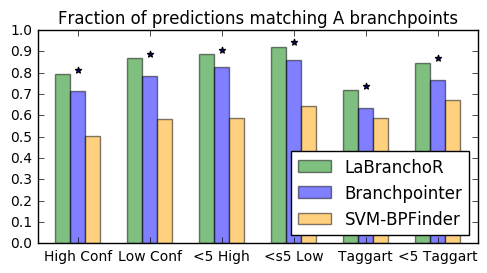

In [27]:
tag = [[0.7198709432529892, 0.84797874359461],
       [0.634465743025242, 0.7680774340482065],
       [0.586828620231543, 0.6731827671284873]]     
tag_totals = [5269] * 2
tag_labels = ['Taggart', '<5 Taggart']

mer = [[0.7947511760336717, 0.8672938846249072, 0.8890814558058926, 0.9230007427581084],
       [0.7140381282495667, 0.7865808368408022, 0.8291656350581827, 0.8615994057935132],
       [0.5023520673434019, 0.5855409754889824, 0.5902451101757861, 0.6422381777667739]]
mer_totals = [4039] * 4
mer_labels = ['High Conf','Low Conf','<5 High','<s5 Low']

performance(mer[0]+tag[0], mer[1]+tag[1], mer[2]+tag[2],
            mer_totals+tag_totals, mer_labels+tag_labels,
            'Fraction of predictions matching A branchpoints')